In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from pyproj import Transformer
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
import warnings

In [2]:
warnings.filterwarnings('ignore')
sns.set(style='whitegrid')
pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)


In [3]:
df = pd.read_csv('./Divar.csv')

In [4]:
df.head()

,Unnamed: 0,cat2_slug,cat3_slug,city_slug,neighborhood_slug,created_at_month,user_type,description,title,rent_mode,rent_value,rent_to_single,rent_type,price_mode,price_value,credit_mode,credit_value,rent_credit_transform,transformable_price,transformable_credit,transformed_credit,transformable_rent,transformed_rent,land_size,building_size,deed_type,has_business_deed,floor,rooms_count,total_floors_count,unit_per_floor,has_balcony,has_elevator,has_warehouse,has_parking,construction_year,is_rebuilt,has_water,has_warm_water_provider,has_electricity,has_gas,has_heating_system,has_cooling_system,has_restroom,has_security_guard,has_barbecue,building_direction,has_pool,has_jacuzzi,has_sauna,floor_material,property_type,regular_person_capacity,extra_person_capacity,cost_per_extra_person,rent_price_on_regular_days,rent_price_on_special_days,rent_price_at_weekends,location_latitude,location_longitude,location_radius
0,0,temporary-rent,villa,karaj,mehrshahr,2024-08-01 00:00:00,مشاور املاک,۵۰۰متر\n۲۰۰متر بنا دوبلکس\n۳خواب\nاستخر آبگرم ...,باغ ویلا اجاره روزانه استخر داخل لشکرآباد سهیلیه,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500.0,NaN,NaN,NaN,سه,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,6,350000.0,1500000.0,3.500000e+09,3500000.0,35.811684,50.936600,500.0
1,1,residential-sell,apartment-sell,tehran,gholhak,2024-05-01 00:00:00,مشاور املاک,دسترسی عالی به مترو و شریعتی \nمشاعات تمیز \nب...,۶۰ متر قلهک فول امکانات,NaN,NaN,NaN,NaN,مقطوع,8.500000e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,3,یک,NaN,NaN,NaN,True,True,True,۱۳۸۴,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500.0
2,2,residential-rent,apartment-rent,tehran,tohid,2024-10-01 00:00:00,NaN,تخلیه پایان ماه,آپارتمان ۳ خوابه ۱۳۲ متر,مقطوع,26000000.0,NaN,NaN,NaN,NaN,مقطوع,750000000.0,False,False,750000000.0,NaN,26000000.0,NaN,NaN,132.0,NaN,NaN,3,سه,NaN,NaN,NaN,True,True,True,۱۴۰۱,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.703865,51.373459,NaN
3,3,commercial-rent,office-rent,tehran,elahiyeh,2024-06-01 00:00:00,NaN,فرشته تاپ لوکیشن\n۹۰ متر موقعیت اداری\nیک اتاق...,فرشته ۹۰ متر دفتر کار مدرن موقعیت اداری,مقطوع,95000000.0,NaN,NaN,NaN,NaN,مقطوع,950000000.0,False,False,950000000.0,NaN,95000000.0,NaN,NaN,90.0,NaN,NaN,4,یک,NaN,NaN,NaN,True,False,True,۱۴۰۰,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,residential-sell,apartment-sell,mashhad,emamreza,2024-05-01 00:00:00,مشاور املاک,هلدینگ ساختمانی اکبری\n\nهمراه شما هستیم برای ...,۱۱۵ متری/شمالی رو به آفتاب/اکبری,NaN,NaN,NaN,NaN,مقطوع,5.750000e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,115.0,single_page,NaN,4,دو,6,NaN,true,True,True,True,۱۴۰۳,NaN,NaN,package,NaN,NaN,shoofaj,air_conditioner,squat_seat,NaN,NaN,north,NaN,NaN,NaN,ceramic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
to_drop =['Unnamed: 0' , 'rent_to_single', 'regular_person_capacity','extra_person_capacity','cost_per_extra_person', 'rent_price_on_regular_days', 'rent_price_on_special_days' , 'rent_price_at_weekends' ,'has_water' , 'has_electricity' , 'has_gas' , 'has_security_guard','floor_material' ]

In [6]:
df['city_slug'].value_counts()


city_slug
tehran           190904
mashhad           69032
karaj             49367
shiraz            37141
isfahan           36953
                  ...  
goli-dagh             5
maraveh-tapeh         5
khoour                3
yanghagh              2
tatar-olya            1
Name: count, Length: 421, dtype: int64

In [7]:
df[df['land_size']== 'توافقی']['price_value'].value_counts()

Series([], Name: count, dtype: int64)

In [8]:

numeric_features = [
    'price_value', 'building_size', 'land_size', 'rooms_count',
    'floor', 'total_floors_count', 'unit_per_floor', 'construction_year',
    'location_latitude', 'location_longitude'
]

categorical_features = [
    'city_slug', 'neighborhood_slug', 'deed_type',
    'cat2_slug', 'cat3_slug', 'user_type', 'building_direction', 'floor_material'
]

boolean_features = [
    'has_balcony', 'has_elevator', 'has_warehouse', 'has_parking',
    'is_rebuilt', 'has_water', 'has_warm_water_provider', 'has_electricity',
    'has_gas', 'has_heating_system', 'has_cooling_system', 'has_restroom',
    'has_security_guard', 'has_barbecue', 'has_pool', 'has_jacuzzi', 'has_sauna'
]


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 61 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   Unnamed: 0                  1000000 non-null  int64  
 1   cat2_slug                   1000000 non-null  object 
 2   cat3_slug                   999999 non-null   object 
 3   city_slug                   999998 non-null   object 
 4   neighborhood_slug           437139 non-null   object 
 5   created_at_month            1000000 non-null  object 
 6   user_type                   288882 non-null   object 
 7   description                 1000000 non-null  object 
 8   title                       999946 non-null   object 
 9   rent_mode                   352994 non-null   object 
 10  rent_value                  351322 non-null   float64
 11  rent_to_single              19 non-null       object 
 12  rent_type                   103961 non-null   object 
 13

In [10]:
cities = df['city_slug'].value_counts()
print()

### Handling missing values in neighborhood_slug

In [11]:
cols = ['location_latitude', 'location_longitude', 'location_radius', 'neighborhood_slug']
df_subset = df[cols]

In [12]:
known = df_subset[df_subset['neighborhood_slug'].notna()]
unknown = df_subset[df_subset['neighborhood_slug'].isna()]

In [13]:
known = known.dropna(subset=['location_latitude', 'location_longitude', 'location_radius'])


In [14]:
counts = known['neighborhood_slug'].value_counts()
valid_neighborhoods = counts[counts >= 2].index
known = known[known['neighborhood_slug'].isin(valid_neighborhoods)]


In [15]:
le = LabelEncoder()
known['neighborhood_encoded'] = le.fit_transform(known['neighborhood_slug'])

In [16]:
X = known[['location_latitude', 'location_longitude', 'location_radius']]
y = known['neighborhood_encoded']


In [17]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [18]:
k = 5  
knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
knn.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

In [19]:
y_pred_val = knn.predict(X_val)
accuracy = accuracy_score(y_val, y_pred_val)
print(f"KNN Accuracy for neighborhood prediction: {accuracy:.2%}")


KNN Accuracy for neighborhood prediction: 85.20%


In [20]:
X_test = unknown[['location_latitude', 'location_longitude', 'location_radius']].dropna()


In [21]:
y_pred_test = knn.predict(X_test)
predicted_labels = le.inverse_transform(y_pred_test)

In [22]:
df.loc[X_test.index, 'neighborhood_slug'] = predicted_labels

print(f"Filled {len(X_test)} missing neighborhood_slug values.")

Filled 117692 missing neighborhood_slug values.


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 61 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   Unnamed: 0                  1000000 non-null  int64  
 1   cat2_slug                   1000000 non-null  object 
 2   cat3_slug                   999999 non-null   object 
 3   city_slug                   999998 non-null   object 
 4   neighborhood_slug           554831 non-null   object 
 5   created_at_month            1000000 non-null  object 
 6   user_type                   288882 non-null   object 
 7   description                 1000000 non-null  object 
 8   title                       999946 non-null   object 
 9   rent_mode                   352994 non-null   object 
 10  rent_value                  351322 non-null   float64
 11  rent_to_single              19 non-null       object 
 12  rent_type                   103961 non-null   object 
 13

## Drop Unnecessery columns 

In [24]:
df2 = df.copy()

In [28]:
df.drop(to_drop, axis = 1 , inplace = True )
df.columns

Index(['cat2_slug', 'cat3_slug', 'city_slug', 'neighborhood_slug',
       'created_at_month', 'user_type', 'description', 'title', 'rent_mode',
       'rent_value', 'rent_type', 'price_mode', 'price_value', 'credit_mode',
       'credit_value', 'rent_credit_transform', 'transformable_price',
       'transformable_credit', 'transformed_credit', 'transformable_rent',
       'transformed_rent', 'land_size', 'building_size', 'deed_type',
       'has_business_deed', 'floor', 'rooms_count', 'total_floors_count',
       'unit_per_floor', 'has_balcony', 'has_elevator', 'has_warehouse',
       'has_parking', 'construction_year', 'is_rebuilt', 'has_water',
       'has_warm_water_provider', 'has_electricity', 'has_gas',
       'has_heating_system', 'has_cooling_system', 'has_restroom',
       'has_security_guard', 'has_barbecue', 'building_direction', 'has_pool',
       'has_jacuzzi', 'has_sauna', 'floor_material', 'property_type',
       'location_latitude', 'location_longitude', 'location_radiu

In [29]:
df.drop(['has_water' , 'has_electricity' , 'has_gas' , 'has_security_guard', 'has_barbecue', 'has_pool' ,'has_jacuzzi' , 'has_sauna' ] , axis = 1 , inplace = True )
df.columns

Index(['cat2_slug', 'cat3_slug', 'city_slug', 'neighborhood_slug',
       'created_at_month', 'user_type', 'description', 'title', 'rent_mode',
       'rent_value', 'rent_type', 'price_mode', 'price_value', 'credit_mode',
       'credit_value', 'rent_credit_transform', 'transformable_price',
       'transformable_credit', 'transformed_credit', 'transformable_rent',
       'transformed_rent', 'land_size', 'building_size', 'deed_type',
       'has_business_deed', 'floor', 'rooms_count', 'total_floors_count',
       'unit_per_floor', 'has_balcony', 'has_elevator', 'has_warehouse',
       'has_parking', 'construction_year', 'is_rebuilt',
       'has_warm_water_provider', 'has_heating_system', 'has_cooling_system',
       'has_restroom', 'building_direction', 'floor_material', 'property_type',
       'location_latitude', 'location_longitude', 'location_radius'],
      dtype='object')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 45 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   cat2_slug                1000000 non-null  object 
 1   cat3_slug                999999 non-null   object 
 2   city_slug                999998 non-null   object 
 3   neighborhood_slug        554831 non-null   object 
 4   created_at_month         1000000 non-null  object 
 5   user_type                288882 non-null   object 
 6   description              1000000 non-null  object 
 7   title                    999946 non-null   object 
 8   rent_mode                352994 non-null   object 
 9   rent_value               351322 non-null   float64
 10  rent_type                103961 non-null   object 
 11  price_mode               573606 non-null   object 
 12  price_value              568346 non-null   float64
 13  credit_mode              352994 non-null   

land_size                  1.000000
is_rebuilt                 0.241432
has_parking                0.225747
has_warehouse              0.225191
property_type              0.218764
cat3_slug                  0.117693
city_slug                  0.074332
location_latitude          0.070101
floor_material             0.062344
rent_type                  0.056950
user_type                  0.053489
has_heating_system         0.051084
transformed_rent           0.033798
created_at_month           0.017706
location_radius            0.016480
has_balcony                0.016478
transformable_price        0.008274
rent_credit_transform      0.005109
price_value                0.002663
building_size              0.002502
transformed_credit         0.001341
credit_mode                0.001082
location_longitude         0.000838
transformable_rent         0.000521
rent_value                 0.000521
transformable_credit      -0.001040
credit_value              -0.001041
rent_mode                 -0

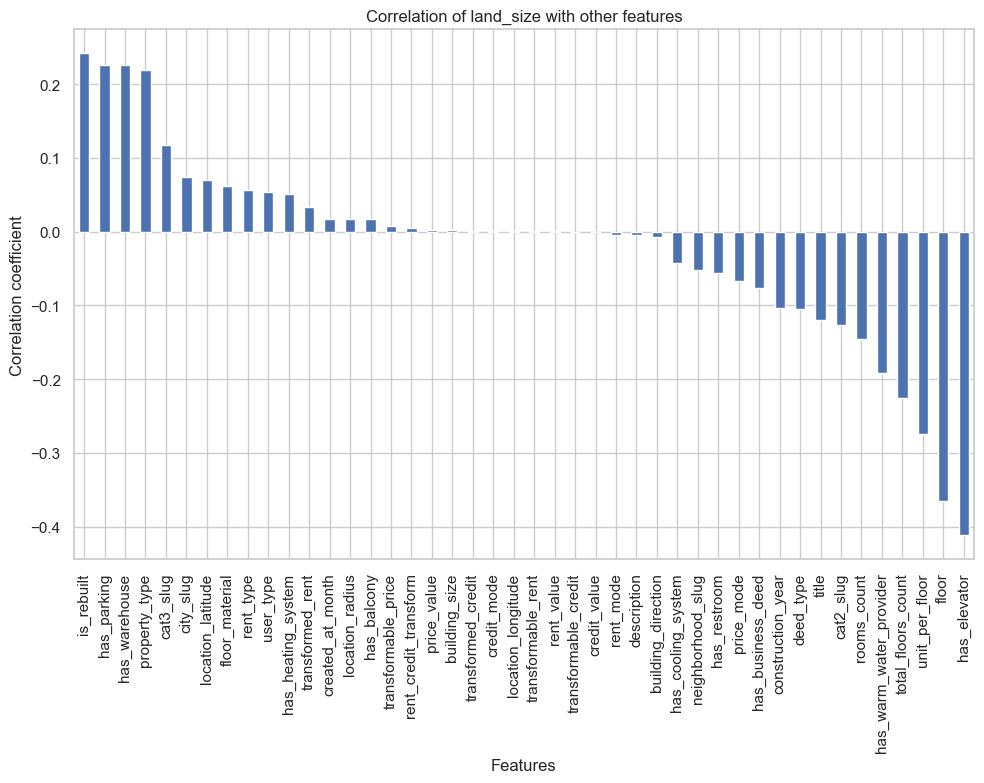

In [31]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# --- فرض می‌کنیم df دیتافریم اصلی است ---

target_col = 'land_size'

# --- 1. جدا کردن ستون‌ها ---
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# --- 2. Encode کردن property_type ---
le = LabelEncoder()
df[target_col] = df[target_col].astype(str)  # اگر null داشت
df[target_col] = le.fit_transform(df[target_col])

# --- 3. Encode کردن سایر ستون‌های دسته‌ای (به جز property_type) ---
df_encoded = df.copy()
for col in categorical_cols:
    if col != target_col:
        df_encoded[col] = df_encoded[col].astype(str)
        df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

# --- 4. محاسبه همبستگی ---
correlations = df_encoded.corr()[target_col].sort_values(ascending=False)

# --- 5. نمایش همبستگی ---
print(correlations)

# --- 6. رسم نمودار ستونی ---
plt.figure(figsize=(10, 8))
correlations.drop(target_col).plot(kind='bar')
plt.title(f'Correlation of {target_col} with other features')
plt.ylabel('Correlation coefficient')
plt.xlabel('Features')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


## Rent columns

In [32]:
df['rent_mode'].value_counts()

rent_mode
مقطوع     292081
مجانی      59241
توافقی      1672
Name: count, dtype: int64

In [33]:
df['rent_value'].value_counts().sort_values()

rent_value
2.580000e+07        1
6.000000e+10        1
4.000001e+06        1
1.500008e+06        1
1.000000e+08        1
                ...  
6.000000e+06    14490
3.000000e+06    16873
5.000000e+06    17475
1.000000e+05    24734
0.000000e+00    59241
Name: count, Length: 1311, dtype: int64

###### Free properties  == its 0 values

In [34]:
df['rent_type'].value_counts().sort_values()

rent_type
full_credit       147
rent_credit    103814
Name: count, dtype: int64

In [35]:
df[(df['rent_mode'].notna() & df['rent_type'].isna()) | (df['rent_type'].notna() & df['rent_mode'].isna())]


,cat2_slug,cat3_slug,city_slug,neighborhood_slug,created_at_month,user_type,description,title,rent_mode,rent_value,rent_type,price_mode,price_value,credit_mode,credit_value,rent_credit_transform,transformable_price,transformable_credit,transformed_credit,transformable_rent,transformed_rent,land_size,building_size,deed_type,has_business_deed,floor,rooms_count,total_floors_count,unit_per_floor,has_balcony,has_elevator,has_warehouse,has_parking,construction_year,is_rebuilt,has_warm_water_provider,has_heating_system,has_cooling_system,has_restroom,building_direction,floor_material,property_type,location_latitude,location_longitude,location_radius
2,residential-rent,apartment-rent,tehran,tohid,2024-10-01 00:00:00,NaN,تخلیه پایان ماه,آپارتمان ۳ خوابه ۱۳۲ متر,مقطوع,26000000.0,NaN,NaN,NaN,مقطوع,7.500000e+08,False,False,7.500000e+08,NaN,26000000.0,NaN,1659,132.0,NaN,NaN,3,سه,NaN,NaN,NaN,True,True,True,۱۴۰۱,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.703865,51.373459,NaN
3,commercial-rent,office-rent,tehran,elahiyeh,2024-06-01 00:00:00,NaN,فرشته تاپ لوکیشن\n۹۰ متر موقعیت اداری\nیک اتاق...,فرشته ۹۰ متر دفتر کار مدرن موقعیت اداری,مقطوع,95000000.0,NaN,NaN,NaN,مقطوع,9.500000e+08,False,False,9.500000e+08,NaN,95000000.0,NaN,1659,90.0,NaN,NaN,4,یک,NaN,NaN,NaN,True,False,True,۱۴۰۰,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,residential-rent,apartment-rent,ahvaz,mellirah,2024-09-01 00:00:00,NaN,اپارتمان ۱۰۰متری واحد جلو دارای دو اتاق خواب ک...,اپارتمان ۱۰۰متری ملی راه واحد جلو,مقطوع,6000000.0,NaN,NaN,NaN,مقطوع,2.500000e+08,False,True,2.500000e+08,400000000.0,6000000.0,1.0,1659,100.0,NaN,NaN,3,دو,3,2,true,False,True,True,۱۳۸۹,False,water_heater,NaN,NaN,squat,NaN,carpet,NaN,NaN,NaN,NaN
6,commercial-rent,office-rent,kermanshah,NaN,2024-11-01 00:00:00,NaN,♦مشاورین املاک سیب♦\n✅️کد:G۱۰۵\n♦با سالها سابق...,واحداداری ۸۰متری ۲۲بهمن(برق),مقطوع,16000000.0,NaN,NaN,NaN,مقطوع,1.500000e+08,False,False,1.500000e+08,NaN,16000000.0,NaN,1659,80.0,NaN,NaN,2,دو,NaN,NaN,NaN,True,False,False,۱۳۹۵,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,residential-rent,apartment-rent,karaj,gohardasht,2024-08-01 00:00:00,NaN,"۱۵۵ متر ۳ خواب ۱ خواب مستر\n\nآشپزخانه:مدرن,هو...",۱۵۵ متر نوساز فول امکانات,مقطوع,100000.0,NaN,NaN,NaN,مقطوع,1.000000e+09,False,False,1.000000e+09,NaN,100000.0,NaN,1659,155.0,NaN,NaN,3,سه,NaN,NaN,NaN,True,True,True,۱۴۰۲,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999979,residential-rent,apartment-rent,nurabad,NaN,2024-11-01 00:00:00,NaN,اپارتمان ۱۴۰متری دوخوابه کف سرامیک طبقه ۴دارای...,یک اپارتمان دوخوابه درخیابان اصلی نوراباد,مجانی,0.0,NaN,NaN,NaN,مقطوع,2.500000e+08,False,False,2.500000e+08,NaN,0.0,NaN,1659,140.0,NaN,NaN,4.0,دو,7.0,5,True,True,True,False,۱۳۹۰,False,water_heater,NaN,NaN,squat,north,ceramic,NaN,NaN,NaN,NaN
999981,residential-rent,house-villa-rent,mashhad,khaje-rabi,2024-08-01 00:00:00,NaN,منزل ویلایی دربست به متراژتقریبی 65متریه خوابه...,ویلایی 65متری یه خواب,مقطوع,100000.0,NaN,NaN,NaN,مقطوع,1.300000e+08,False,False,1.300000e+08,NaN,100000.0,NaN,1325,65.0,NaN,NaN,NaN,یک,NaN,NaN,True,NaN,True,False,۱۳۸۷,False,water_heater,heater,NaN,squat,north,mosaic,NaN,NaN,NaN,NaN
999984,commercial-rent,shop-rent,qarchak-city,NaN,2024-08-01 00:00:00,NaN,مغازه تجاری بهر بلوار باقرآباد\nهمکف دارای کلی...,بهر بلوار باقرآباد ۲۰۰ متر تجاری همکف,مقطوع,111111.0,NaN,NaN,NaN,مجانی,0.000000e+00,False,False,0.000000e+00,NaN,111111.0,NaN,1659,200.0,NaN,NaN,NaN,یک,NaN,NaN,NaN,NaN,NaN,NaN,۱۳۷۲,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
999985,commercial-rent,shop-rent,parand-city,NaN,2024-07-01 00:00:00,NaN,رهن و اجاره مغازه 15 متری واقع در کوزو 5 خ اما...,رهن و اجاره مغازه 15 متری,مقطوع,100000.0,NaN,NaN,NaN,مقطوع,2.200000e+08,False,False,2.200000e+08,NaN,100000.0,NaN,1659,15.0,NaN,NaN,NaN,بدون اتاق,NaN,NaN,NaN,NaN,NaN,NaN,۱۳۹۸,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
df['has_balcony'].value_counts().sort_values()

has_balcony
unselect       223
False         4545
True         20692
false        88855
true        392096
Name: count, dtype: int64

In [37]:
df['has_balcony'] = df['has_balcony'].map({'false': 'False', 'true': 'True', 'unselect': np.nan })
df['has_balcony'].value_counts().sort_values()

has_balcony
False     88855
True     392096
Name: count, dtype: int64

In [38]:
df['has_elevator'].value_counts().sort_values()

has_elevator
False    176601
True     365148
Name: count, dtype: int64

In [39]:
df['has_warehouse'].value_counts().sort_values()

has_warehouse
False    145842
True     582313
Name: count, dtype: int64

In [40]:
df['has_parking'].value_counts().sort_values()

has_parking
False    175614
True     552542
Name: count, dtype: int64

In [41]:
df['building_direction'].value_counts()

building_direction
south       159453
north       142009
east         12111
west          7143
unselect      3207
Name: count, dtype: int64

In [49]:
df2 = df.copy()

In [52]:
df = df2.copy()

In [55]:
df.loc[df['building_direction'] == 'unselect', 'building_direction'] = np.nan


In [56]:
df['building_direction'].value_counts()

building_direction
south    159453
north    142009
east      12111
west       7143
Name: count, dtype: int64

In [57]:
df['construction_year'].value_counts()

construction_year
۱۴۰۳           116260
۱۳۹۰            59139
۱۴۰۲            58424
۱۴۰۰            53674
۱۳۹۵            53029
۱۳۹۸            38207
۱۳۹۷            36326
۱۳۹۶            35487
۱۴۰۱            35328
۱۳۸۵            34065
۱۳۹۹            29594
۱۳۹۳            29094
۱۳۹۲            26130
۱۳۹۴            26110
۱۳۸۸            24268
۱۳۸۰            23480
قبل از ۱۳۷۰     20637
۱۳۸۹            16755
۱۳۹۱            16316
۱۳۸۷            14136
۱۳۸۶            13468
۱۳۸۳             9894
۱۳۸۴             8494
۱۳۷۵             7247
۱۳۸۲             6965
۱۳۷۱             5531
۱۳۸۱             3590
۱۳۷۸             3025
۱۳۷۹             2415
۱۳۷۷             2117
۱۳۷۲             1914
۱۳۷۳             1827
۱۳۷۶             1593
۱۳۷۴             1289
Name: count, dtype: int64

In [58]:
persian_to_english_map = str.maketrans('۰۱۲۳۴۵۶۷۸۹', '0123456789')

df['construction_year'] = (
    df['construction_year']
    .astype(str)
    .apply(lambda x: x.translate(persian_to_english_map) if isinstance(x, str) else x)
    .str.extract(r'(\d+)', expand=False)   # Extract only digits
)

# Convert to numeric, coercing errors to NaN
df['construction_year'] = pd.to_numeric(df['construction_year'], errors='coerce')

# Check result
print(df['construction_year'].sort_values().unique())

[1370. 1371. 1372. 1373. 1374. 1375. 1376. 1377. 1378. 1379. 1380. 1381.
 1382. 1383. 1384. 1385. 1386. 1387. 1388. 1389. 1390. 1391. 1392. 1393.
 1394. 1395. 1396. 1397. 1398. 1399. 1400. 1401. 1402. 1403.   nan]


In [61]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Select only the required columns
df = df[["has_balcony", "building_direction", "construction_year"]].copy()

# Encode categorical column
le = LabelEncoder()
df["building_direction"] = df["building_direction"].astype(str)  # convert NaN to 'nan'
df["building_direction"] = le.fit_transform(df["building_direction"])
df["building_direction"] = df["has_balcony"].astype(str)  # convert NaN to 'nan'
df["building_direction"] = le.fit_transform(df["has_balcony"])

# Split into train (non-null target) and rows with missing has_balcony
train_df = df[df["has_balcony"].notnull()].copy()
missing_df = df[df["has_balcony"].isnull()].copy()

# Features and target
X = train_df.drop("has_balcony", axis=1)
y = train_df["has_balcony"].astype(int)

# Train/test split for accuracy
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Accuracy
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {acc:.2f}")

# Cross-validation accuracy
cv_scores = cross_val_score(model, X, y, cv=5, scoring="accuracy")
print(f"Cross-Validation Accuracy: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}")


Test Accuracy: 1.00
Cross-Validation Accuracy: 1.00 ± 0.00
